 # <font  face='cursive'><center> <b>Women’s Clothing E-Commerce Reviews</b> </center></font>

 ## **Women’s Clothing E-Commerce dataset revolving around the reviews written by customers.**

**Content**

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

* Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
* Age: Positive Integer variable of the reviewers age.
* Title: String variable for the title of the review.
* Review Text: String variable for the review body.
* Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
* Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
* Division Name: Categorical name of the product high level division.
* Department Name: Categorical name of the product department name.
* Class Name: Categorical name of the product class name.

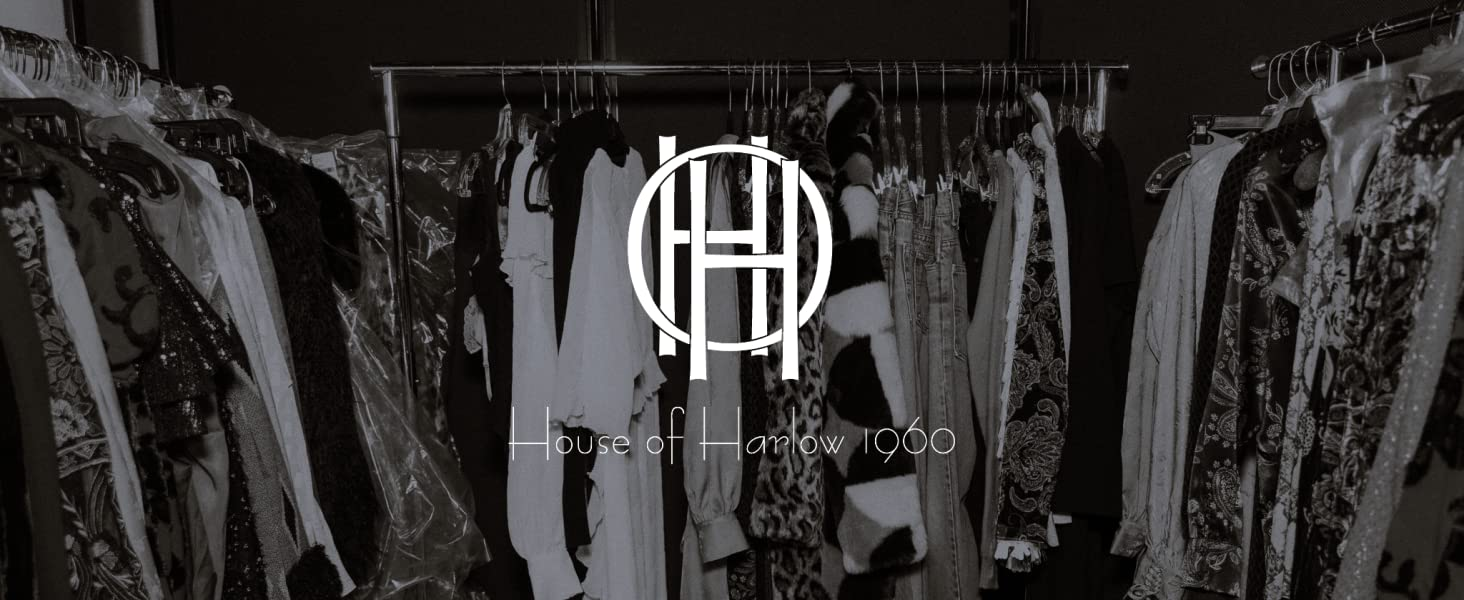

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Data Exploring**

In [ ]:
# Import Libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Sentiment Analysis
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
from nltk.util import ngrams
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import numpy as np
import re
import plotly.express as px
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 



In [ ]:
data = pd.read_csv("../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv" , index_col=0)
data.head()

# Data Cleaning

**As you can see from the head of the dataset, we have some unnecessary features such as Clothing ID, Title. First of all, I will drop this features.**

In [ ]:
data = data.drop(['Title', 'Clothing ID', 'Positive Feedback Count'], axis=1)
data.head()

In [ ]:
data.rename(columns = {'Review Text':'ReviewText','Recommended IND':'RecommendedIND', 'Division Name':'DivisionName',
                       'Department Name':'DepartmentName',
                              'Class Name':'ClassName'}, inplace = True)

In [ ]:
# Checking for the missing values
count_NaN = data.isna().sum()
count_NaN

It is impossible to replace the Review Text features. Therefore, We will drop the missing rows from the dataset.

In [ ]:
# Dropping the missing values in the rows
data = data.dropna(subset=['ReviewText'], axis=0)
data = data.reset_index(drop=True)

In [ ]:
data['DepartmentName'].describe()

In [ ]:
data['DepartmentName'].fillna('Tops',inplace=True)

In [ ]:
data['DivisionName'].describe()

In [ ]:
data['DivisionName'].fillna('General',inplace=True)

In [ ]:
data['ClassName'].describe()

In [ ]:
data['ClassName'].fillna('Dresses',inplace=True)

### Correlation :

**HeatMap** - A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader. This is a great tool to assist the audience towards the areas that matter the most when you have a large volume of data.

> - It shows the relationship between two columns or variables
> - if correlation is equal to zero    i.e    No Correlated
> - if correlation is equal to one     i.e    Perfect Correlated
> - if correlation is between less than zero to less than 0.45    i.e    small positive correlated
> - if correlation is between greater than 0.5  to 0.9 then it is   i.e large positive correlated
> - if correlation is negative to -0.45 is    small neagtive correlated
> - if correlation is negative between greater than - 0.5  to - 0.9 then it is   i.e large negative correlated

In [ ]:
# plotting correlation plot

plt.figure(figsize=(10,10))
#plotting the figure size based on width and height

sns.heatmap(data.corr(),cmap='PiYG',annot=True,linewidths=1,fmt='0.2f')


# Data Visualization

**What age group has given what types of Ratings?**

In [ ]:
# The age distribution in data
plt.hist(data['Age'], color="green", label = "Age")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution in Data")

**Analysis of Ratings**

In [ ]:
import plotly.express as px
fig = px.histogram(data['Rating'],
                   labels={'value': 'Rating',
                           'count': 'Frequency',
                           'color': 'Rating'}, color=data['Rating'])
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Ratings',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

**Analysis based on Department**

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(data.Rating, hue=data.DepartmentName)
plt.title('Age based distribution')
plt.show()

Ratings of the Tops is More.

**Analysis Based On Department Name**

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data.DepartmentName)
plt.title('Count based on Department Name')
plt.xticks(rotation=90)
plt.show()

We can say that Tops are in more demand.

**Analysis of Class Names**

In [ ]:
## visualizing the most valued Class  prefered for recommendaion
industry = data['ClassName'].value_counts().head(10)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, palette="husl")
plt.xticks(rotation=45)
plt.xlabel('Class Names', fontsize=12)
plt.ylabel('freq of Class Names', fontsize=12)
plt.title("Most valued Class ", fontsize=16)
plt.show()

**Analysis of Division based on Ratings**

In [ ]:
plt.figure(figsize=(10,5))
data.groupby(['Rating'])['DivisionName'].count().sort_values(ascending=False).plot.bar()
plt.ylabel('No of particular Division')
plt.title("Count of Division based on Ratings ",fontsize=20)
plt.show()

**Department Name and Recommendation Distribution**

In [ ]:
fig = px.histogram(data['DepartmentName'], color=data['RecommendedIND'],
                   labels={'value': 'Department Name',
                           'color': 'Recommended?'})

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Department Name and Recommendation Distribution',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

**Distribution of the Length of the Texts**

In [ ]:
data['length_of_text'] = [len(i.split(' ')) for i in data['ReviewText']]
fig = px.histogram(data['length_of_text'], 
                   labels={"value": "Length of the Text",
                           "color": 'Recommended'},
                   color=data['RecommendedIND'])

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='overlay')
fig.show()

## WorldCloud before cleaning the  text Data

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords11 = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords11,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(data['ReviewText'][:5000])

# Data Preprocessing

# <font color='red' face='cursive'><center> Sentiment Analysis </center></font>

<font  face='Comic Sans MS' style="font-size:15px;">Sentiment analysis is the process of using natural language processing, text analysis, and statistics to analyze customer sentiment. The best businesses understand the sentiment of their customers—what people are saying, how they’re saying it, and what they mean. </font><br><br>
<font  face='Comic Sans MS' style="font-size:14px;">Customer sentiment can be found in tweets, comments, reviews, or other places where people mention your brand. Sentiment Analysis is the domain of understanding these emotions with software, and it’s a must-understand for developers and business leaders in a modern workplace.</font>

In [ ]:
def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'[^\w]', ' ', text)
    return text

In [ ]:
data['ReviewText'] = data['ReviewText'].apply(clean)
data['ReviewText'].head()

In this section, we will remove all punctuations and numbers from the all dataframe. They will be not usefull for my model training.

## Tokenizing with NLTK

Tokenizing with NLTK will help me to clean the dataset for better model training.

In [ ]:
def tokenization(inputs): 
    return word_tokenize(inputs)


data['text_tokenized'] = data['ReviewText'].apply(tokenization)
data['text_tokenized'].head()

## Stopwords Removal

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')


def stopwords_remove(inputs):  
    return [k for k in inputs if k not in stop_words]


data['text_stop'] = data['text_tokenized'].apply(stopwords_remove)
data['text_stop'].head()

## Lemmatization

Lemmatization in NLTK is the algorithmic process of finding the lemma of a word depending on its meaning and context. Lemmatization usually refers to the morphological analysis of words, which aims to remove inflectional endings. It helps in returning the base or dictionary form of a word known as the lemma.



In [ ]:
lemmatizer = WordNetLemmatizer()


def lemmatization(inputs): 
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]


data['text_lemmatized'] = data['text_stop'].apply(lemmatization)
data['text_lemmatized'].head()

In [ ]:
# Joining Tokens into Sentences
data['final'] = data['text_lemmatized'].str.join(' ')
data['final'].head()

## WorldCloud after cleaning the Data

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords11 = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords11,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(data['ReviewText'][:5000])

## WordCloud of the Recommended Reviews

In [ ]:
data_recommended = data[data['RecommendedIND'] == 1]  
data_not_recommended = data[data['RecommendedIND'] == 0]  

WordCloud_recommended = WordCloud(max_words=500,
                                  random_state=30,
                                  collocations=True).generate(str((data_recommended['final'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_recommended, interpolation='bilinear')
plt.title('WordCloud of the Recommended Reviews', fontsize=20)
plt.axis("off")
plt.show()

## WordCloud of the Not Recommended Reviews

In [ ]:
WordCloud_not_recommended = WordCloud(max_words=500,
                                      random_state=30,
                                      collocations=True).generate(str((data_not_recommended['final'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_not_recommended, interpolation='bilinear')
plt.title('WordCloud of the Not Recommended Reviews', fontsize=20)
plt.axis("off")
plt.show()


# Train-Test-Validation Split

In [ ]:
y = data['RecommendedIND']
X = data['final']


In [ ]:
# Train-Test-Validation Split
x, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=13)  # Test: %20

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=13)  # Val: %20

In [ ]:
num_words = 1000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

Tokenized_train = tokenizer.texts_to_sequences(X_train)
Tokenized_val = tokenizer.texts_to_sequences(X_val)


Padding The Dataset

In [ ]:
maxlen = 50
Padded_train = pad_sequences(Tokenized_train, maxlen=maxlen, padding='pre')
Padded_val = pad_sequences(Tokenized_val, maxlen=maxlen, padding='pre')

# Model Preparation

In [ ]:
# Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense,Dropout,SimpleRNN,Flatten
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GlobalAvgPool1D


## ANN Model

**Defining Model**

In [ ]:
# Creating the Model
model = Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(Dropout(0.2))

model.add(GlobalAvgPool1D())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

**Train the model**

In [ ]:
model.fit(Padded_train, y_train, epochs=100,validation_data=(Padded_val, y_val),batch_size=32)

**Preparing test data**

In [ ]:
X_test = X_test.apply(tokenization)
X_test = X_test.apply(stopwords_remove)
X_test = X_test.apply(lemmatization)
X_test = X_test.str.join(' ')

X_test.head()

**Evaluating test data**

In [ ]:
Tokenized_test = tokenizer.texts_to_sequences(X_test)
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, y_test)

# Conclusion
Using natural language processing models to perform sentiment analysis on a particular text can be a powerful tool for Data Science. 
This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization.